## [[DSC-2024](https://comp.ita.br/dsc/edicoes/2024/)] Develop a predictive model for the presence of hold(s) in commercial flights with origin and destination at the 12 main airports in Brazil

### Author: [Lucas Lima](https://www.linkedin.com/in/lucaslima25/)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

from pathlib import Path
from datetime import datetime

In [2]:
sys.path.append(str(Path().cwd().parent))

from preprocessing import preprocessor

In [3]:
plt.rcParams["figure.dpi"] = 100

In [4]:
%reload_ext watermark
%watermark -a "xxx Team" --iversions

Author: xxx Team

sys       : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
matplotlib: 3.8.0
pandas    : 2.1.4
numpy     : 1.24.3
seaborn   : 0.13.0



### Preprocessamento dos Dados

In [5]:
data = pd.read_csv('../../data/base/public.csv', index_col='flightid')

In [6]:
raw_df = data[~data['espera'].isna()].copy()

In [7]:
to_cat = ["prev_troca_cabeceira", "troca_cabeceira_hora_anterior", "espera"]

In [8]:
raw_df[to_cat] = raw_df[to_cat].astype('category')

In [9]:
raw_df_prediction = data[data['espera'].isna()].copy()
raw_df_prediction.drop(['espera'], axis=1, inplace=True)

In [10]:
# ################ SOMENTE TESTES ####################
# raw_df = raw_df[:1000]
# raw_df_prediction = raw_df_prediction[:1000]

Started ImputeHandler: 10:02:16Z
Finished ImputeHandler: 10:05:10Z
Started MetarHandler: 10:05:10Z
Finished MetarHandler: 10:09:36Z
Started MetafHandler: 10:09:36Z
Finished MetafHandler: 10:13:34Z
Started SatelliteImageHandler: 10:13:34Z


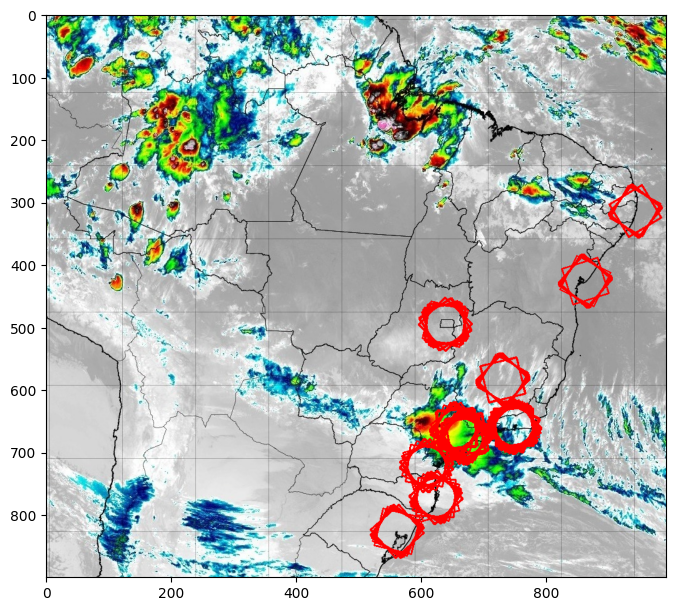

In [11]:
df = preprocessor(
    raw_df,
    satImage_width = 60,
    satImage_outputWidth = 32,
    satImage_outputHeight = 32,
    satImage_printRoutes = True,
    satImage_printEachImage = False,
    date_holiday_near = 2,
    balancer_method='under',
    balancer_ratio=1,
    balancer_target='espera',
    balancer_categorical_features=[0, 1, 2, 3, 4, 5],
    apply_balancer = False,
    drop_outlier=False
)

In [ ]:
df.to_csv(f"../../data/preprocessing/df_padding_60_drop_0.csv", index=False)

In [ ]:
df_prediction = preprocessor(
    raw_df_prediction,
    satImage_width = 60,
    satImage_outputWidth = 32,
    satImage_outputHeight = 32,
    satImage_printRoutes = True,
    satImage_printEachImage = False,
    date_holiday_near = 2,
    apply_balancer = False,
    drop_outlier=False
)

In [ ]:
df_prediction.to_csv(f"../../data/preprocessing/df_prediction_padding_60_drop_0.csv", index=True)

### Exploração de Dados

In [ ]:
correlation_matrix = df.drop(['destino'], axis=1).corr()

reindex = correlation_matrix['espera'].sort_values(ascending=False).index
correlation_matrix = correlation_matrix.loc[reindex[::-1], reindex[::-1]]

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(18, 12), dpi=300)  # Tamanho da figura
plt.title("Correlation Matrix", fontsize=20, fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=mask, annot_kws={'size': 5})
plt.xticks(rotation=45, ha='right')
plt.savefig("../../images/correlation_matrix_padding_60_drop_0.png")
plt.show()